<b> Датасет: https://www.kaggle.com/datasets/ashydv/housing-dataset </b>


<b> 1. Зниження розмірності і візуалізація даних
Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат. </
b>

Код нижче завантажує дані з файлу Housing.csv, вибирає лише числові стовпці для подальшої роботи і відображає перші кілька рядків.

In [1]:
import pandas as pd

# Завантаження даних
data = pd.read_csv("Housing.csv")

# Вибір числових ознак для аналізу
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data_numerical = data[numerical_features]

# Перевірка даних
data_numerical.head()


<ipython-input-1-a1577fac95db>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


Далі дані масштабуються для нормалізації значень, що важливо для роботи алгоритмів зниження розмірності.



In [2]:
from sklearn.preprocessing import StandardScaler

# Масштабування числових даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Перевірка масштабованих даних
pd.DataFrame(data_scaled, columns=numerical_features).head()


,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692


Тут ми знижуємо розмірність даних до двох за допомогою PCA і будуємо графік розсіювання для візуалізації.

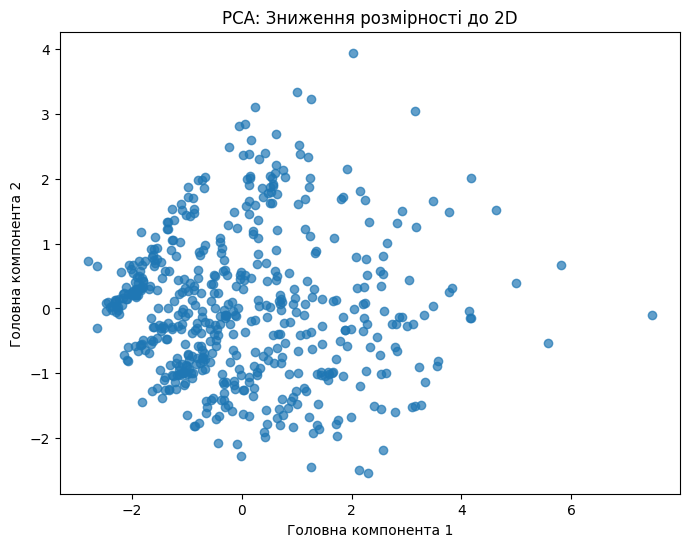

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Зниження розмірності до 2 за допомогою PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Візуалізація результатів PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7)
plt.title("PCA: Зниження розмірності до 2D")
plt.xlabel("Головна компонента 1")
plt.ylabel("Головна компонента 2")
plt.show()


Метод t-SNE дозволяє візуалізувати дані в 2D, зберігаючи структуру кластерів, що не завжди можливо з PCA.

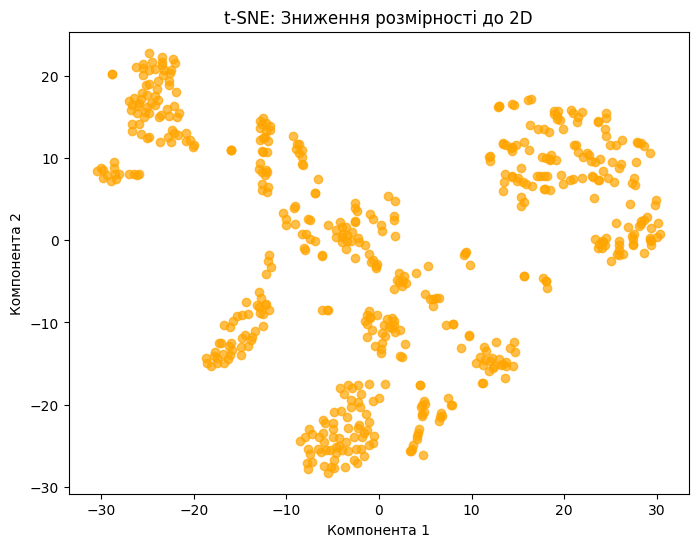

In [4]:
from sklearn.manifold import TSNE

# Зниження розмірності до 2 за допомогою t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Візуалізація результатів t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.7, color='orange')
plt.title("t-SNE: Зниження розмірності до 2D")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()



<b> 2. Кластерний аналіз
За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення. </b>


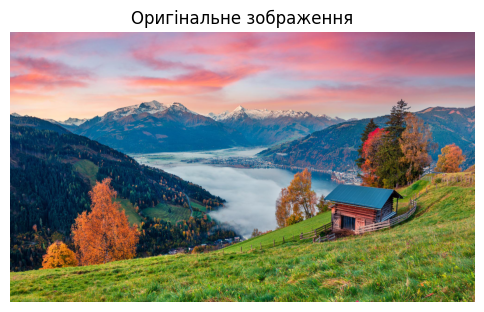

In [1]:
from skimage import io
import matplotlib.pyplot as plt

# Завантаження зображення
image = io.imread('lab2.jpg') 

# Виведення оригінального зображення
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Оригінальне зображення")
plt.axis("off")
plt.show()

Ми використовуємо бібліотеку skimage для завантаження зображення.
plt.imshow() виводить зображення, щоб побачити його оригінальний вигляд.



In [2]:
import numpy as np

# Перетворення зображення у матрицю пікселів
image_data = image / 255.0  # Нормалізація пікселів (значення від 0 до 1)
pixels = image_data.reshape(-1, 3)  # Перетворення в 2D-масив (рядки = пікселі, колонки = RGB)

print("Розмір перетворених даних:", pixels.shape)


Розмір перетворених даних: (2326000, 3)


Ми перетворюємо 3D-масив зображення (висота, ширина, канали) у 2D-масив, де кожен рядок відповідає окремому пікселю.
Масштабуємо значення пікселів до діапазону [0, 1], що покращує точність кластеризації.

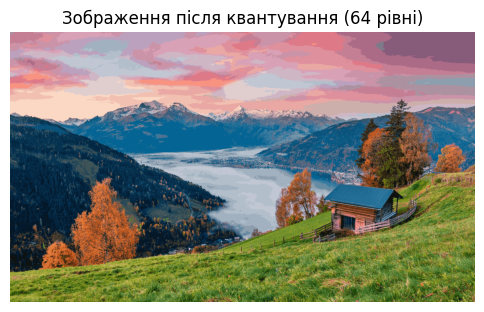

In [3]:
from sklearn.cluster import KMeans

# Кластеризація з 64 рівнями кольорів
kmeans = KMeans(n_clusters=64, random_state=42)
kmeans.fit(pixels)

# Заміна пікселів на центроїди кластерів
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_pixels.reshape(image_data.shape)

# Виведення квантизованого зображення
plt.figure(figsize=(6, 6))
plt.imshow(compressed_image)
plt.title("Зображення після квантування (64 рівні)")
plt.axis("off")
plt.show()


Алгоритм k-means зменшує кількість кольорів до 64, зберігаючи основну візуальну інформацію.
cluster_centers_ — центроїди кластерів (основні кольори).
Пікселі замінюються на центроїди відповідних кластерів.

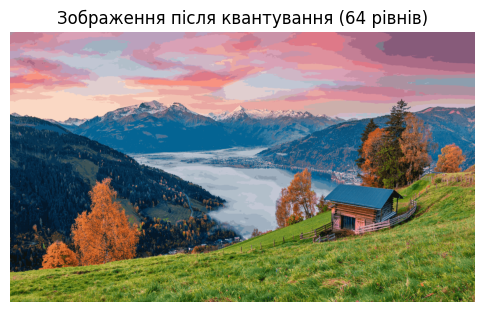

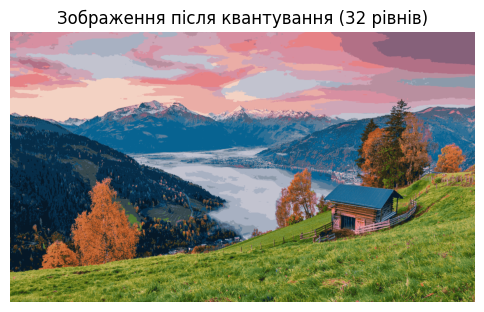

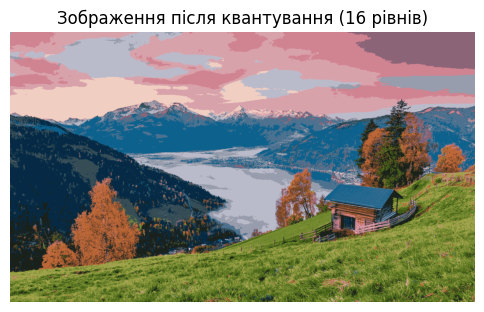

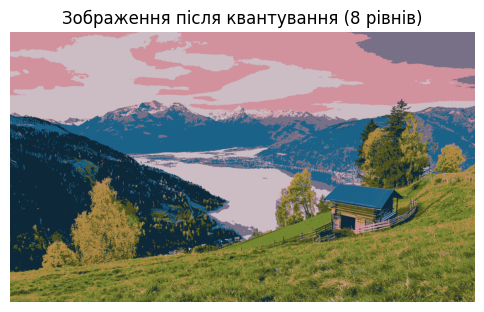

In [4]:
# Функція для квантування зображення з різними рівнями кольорів
def quantize_image(image_data, n_colors):
    pixels = image_data.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    return compressed_pixels.reshape(image_data.shape)

# Квантування для різних глибин
for n_colors in [64, 32, 16, 8]:
    compressed_image = quantize_image(image_data, n_colors)
    plt.figure(figsize=(6, 6))
    plt.imshow(compressed_image)
    plt.title(f"Зображення після квантування ({n_colors} рівнів)")
    plt.axis("off")
    plt.show()


Ми створюємо функцію quantize_image, щоб спростити обчислення для різних рівнів кольорів.
Повторюємо кластеризацію для 64, 32, 16 і 8 рівнів.


<b> 3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. </b> 

In [1]:
import pandas as pd

# Завантаження даних
data = pd.read_csv("spam.csv", encoding="latin-1")

# Перейменування та вибір потрібних колонок
data = data.rename(columns={"v1": "label", "v2": "text"})[["label", "text"]]

# Перетворення міток класів у числові значення
data["label"] = data["label"].map({"ham": 0, "spam": 1})

# Перевірка структури даних
print("Розмір датасету:", data.shape)
print(data.head())


<ipython-input-1-1470cd13201e>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Розмір датасету: (5572, 2)
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Завантажуємо файл spam.csv і читаємо його за допомогою pandas.
Вибираємо лише потрібні стовпці: label (мітка класу) і text (текст повідомлення).
Перетворюємо мітки ham і spam у числові значення (0 для ham і 1 для spam).


In [2]:
import re

# Власний список стоп-слів
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of",
    "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then",
    "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", 
    "t", "can", "will", "just", "don", "should", "now"
])

# Функція для очищення тексту
def preprocess_text(text):
    # Переведення тексту в нижній регістр
    text = text.lower()
    # Видалення пунктуації та спеціальних символів
    text = re.sub(r"[^\w\s]", "", text)
    # Видалення стоп-слів
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# Передобробка текстів
data["text"] = data["text"].apply(preprocess_text)

# Перевірка очищеного тексту
print("Приклад очищеного тексту:")
print(data["text"].iloc[0])


Приклад очищеного тексту:
go jurong point crazy available bugis n great world la e buffet cine got amore wat


Видаляємо пунктуацію та спеціальні символи.
Видаляємо стоп-слова, які не додають значення для класифікації.
Приводимо всі тексти до нижнього регістру.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Хмара слів для класу "ham"
ham_text = " ".join(data.loc[data["label"] == 0, "text"])
wordcloud_ham = WordCloud(width=800, height=400, background_color="white").generate(ham_text)

# Відображення хмари слів для "ham"
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation="bilinear")
plt.title("Хмара слів для класу 'ham'")
plt.axis("off")
plt.show()

# Хмара слів для класу "spam"
spam_text = " ".join(data.loc[data["label"] == 1, "text"])
wordcloud_spam = WordCloud(width=800, height=400, background_color="white").generate(spam_text)

# Відображення хмари слів для "spam"
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.title("Хмара слів для класу 'spam'")
plt.axis("off")
plt.show()


Генеруємо текст для хмари слів окремо для класів ham і spam.
Створюємо візуалізацію для кожного класу.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ініціалізація TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Перетворення текстів у вектори
X = vectorizer.fit_transform(data["text"])
y = data["label"]

# Перевірка розміру матриці
print(f"Розмір матриці TF-IDF: {X.shape}")


Використовуємо TfidfVectorizer для перетворення текстів у числові вектори.
Зберігаємо результат у X, а мітки класів у y.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання моделі логістичної регресії
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)

# Оцінка якості моделі
print("Звіт класифікації:\n", classification_report(y_test, y_pred))
print("Точність моделі:", accuracy_score(y_test, y_pred))


Розділяємо дані на тренувальну (80%) і тестову (20%) вибірки.
Навчаємо модель логістичної регресії.
Оцінюємо точність та інші метрики класифікації.